<a href="https://colab.research.google.com/github/Jorge-89/Data-Science-CoderHouse/blob/main/estad%C3%ADstica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

# LIBRERÍAS A IMPORTAR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import random 
import seaborn as sns
from sklearn import datasets
import warnings

In [ ]:
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

# NUESTRA DISTRIBUCIÓN DE DATOS 

¿Cómo podemos saber que distribición siguen nuestros datos?

Conocer que distribución tienen nuestros datos es un paso básico de cualquier trabajo en Data Science y uno de los más importantes cuando hacemos EDA.

Una de las formas para identificar que distribución sigue una variable es mirando un histograma. Este método, a veces, puede ser missleading porque pareciera cambiar con la modificación de los bins.(columnas del histograma).

Un buen método es la prueba de Anderson-Darling que consiste en plotear la CDF(Cumulative Distribution Fuction) o Función de Distribución Acumulada.  Este método hace que sea fácil conocer y comparar distribuciones incluso cuando sean desconocidas, es decir que no está parametrizada. 

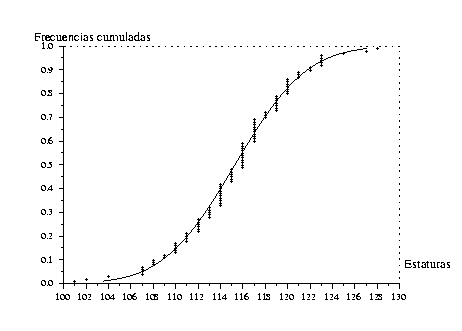

Por ejemplo, mirando la CDF de alturas (Variable Aleatoria Continua) podemos observar que el 50% de las personas tienen una alturas <= a 115 cm o ,también, que únicamente el 20% de las personas supera los 220 cm.

Cuando construimos una CDF a partir de los datos de muestreo la llamaremos ECDF (Empirical Cumulative Distribution  Funtion). Cuando la construimos a partir de datos generados por una distribución parametrizada la llamaremos CDF o CDF teórica.

En nuestro ejemplo vamos a verificar que el ancho de los pétalos de la especie 1 tenga una distribución normal. En caso quisieramos comparar con otra distribución conocida (es decir que conocemos sus parámetros) tenemos que cambiar la función de sampleo teórica: sample_theo.Por ejemplo, si quiesieramos evalular si dicha muestra corresponde a una distribución de Poisson cambiariamos la función y parámetro, usando lambda como tal.

lambda= 5 ( si fuera la que siguen nuestros datos)
sample_theo=np.poisson(lam=lambda,10000)




Pero ¿Cómo lo hacemos en Python? Definiendo una función y ploteando.

In [ ]:
def cdf(data): #Defino mi función. Toma por parametro una serie/lista/array
  x = np.sort(data) #Ordeno mis datos de forma creciente
  y = np.arange(1, len(data)+1) / len(data) #Asigno el peso de mi valor .. piensen un rato que se hace en esta linea
  return x,y #Devuelvo los valores almacenados en x e y

Para hacer un test de normalidad (podría ser exponencial, binomial, uniforme, etc) lo que vamos a hacer es graficar la ECDF de nuestra muestra (iris dataset) con la CDF que correspondería si esos datos tuvieran una distribución normal, siguiendo los parametros mu y sigma que calculamos para dicha muestra. Para esto vamos a:


1.   Generar la media y desviación standar de nuestros datos (asumiendo que son normales)
2.   Vamos a simular una muestra de 10.000 valores siguiendo los parametros calculados en 1
1.   Calcular la CDF de estos datos, que llamaremos x_theo e y_theo
2.   Calcular la ECDF de nuestros datos, que llamaermos x_emp e y_emp

1.   Vamos a plotear ambos gráficos y compararlos. Si se solapan es que nuestros datos siguen una distribución normal.
















In [ ]:
#Importamos nuestra data a trabajar y la convertimos en DataFrame. En este caso usaremos un data set llamado Iris
iris=datasets.load_iris()  
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['target']=pd.Series(iris.target)

#Miramos por arriba de que se trata este Data Set
print(df_iris.head(),'\n\n')
print(df_iris.describe(),'\n\n')
print(df_iris.info())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns] 


       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%      

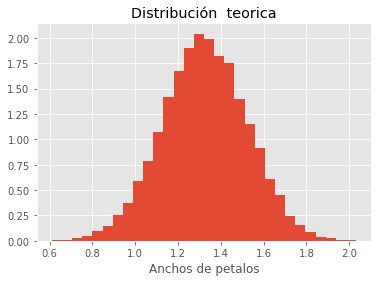

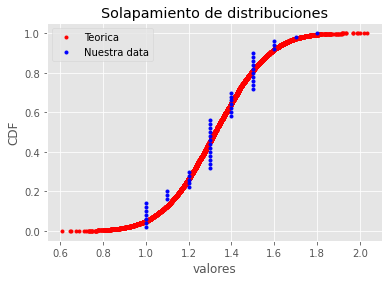

In [ ]:
#VAMOS A CHEQUEAR SI El ANCHO DEL PETALO, DE LA ESPECIE 1, TIENE DISTRIBUCIÓN NORMAL
data=df_iris.loc[df_iris.target==1,'petal width (cm)'] #Guardo como data únicamente el ancho de petalos de la especie 1

mu=np.mean(data) #Calculo la media de mis datos
sigma=np.std(data) #Calculo la desviación estandar de mis datos 

samples_theor=np.random.normal(mu,sigma,10000) #Genero 10000 datos a partir de una distribución normal con parametros mu y sigma
plt.hist(samples_theor,30,density=True) #Hago un histograma
plt.title('Distribución  teorica')
plt.xlabel('Anchos de petalos')
plt.show()

print('\n\n')

x_theor,y_theor=cdf(samples_theor) #Genero la CDF de mis datos simulados

x_emp,y_emp=cdf(data) #Genero la ECDF de mis datos muestrales (data set) 
print('\n\n')

_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none',color='r',label='Teorica')
_ = plt.xlabel('valores')
_ = plt.ylabel('CDF')
_ = plt.plot(x_emp, y_emp, marker='.', linestyle='none',color='b',label='Nuestra data')
_ =plt.title('Solapamiento de distribuciones')
_ = plt.legend()
plt.show()




Podemos ver que distribución simulada (teórica)pareciera tener su media muestral alrededor del 1.35 cm y dejar el 50% de los datos por encima y debajo. 

La distribución de nuesta muestra pareciera, con un n=50, tener la mayor cantidad de datos próximos al valor 1.35 cm también y a ambos lados de esta distribuciones similares.

También se ve que la mayoría de los posibles anchos se encuentran entre 1 y 1.75 cm, entendiendo que se corresponde con los valores >= y <= a 3sigmas 

Además podemos ver que los datos obtenidos de ambas muestras (teórica y data set) se solapan.

En conclusión podemos decir que la distribución de anchos de petalos de nuestra muestra sigue una distribución normal. Podemos suponer (para ser precisos habría que calcular ambos intervalos de confianza) que no existe una diferencia estadisticamente significativa entre ambas medias. Y si está diferencia existeira probablemente se deba a que necesitamos más de 50 observaciones para ese mismo nivel de confianza.

# EFECTO DE MAYOR VARIANZA EN LOS DATOS

Veamos que pasa con la distribución normal cuando aumentamos la desviación estandar. 

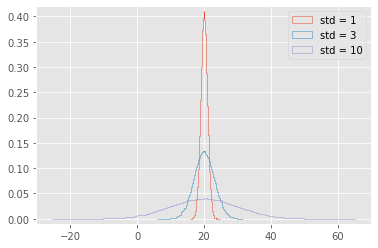

In [ ]:
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Hacemos los histogramas
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

# ESTIMADORES PUNTUALES DE MEDIA Y VARIANZA POBLACIONAL

En estadística la estimación puntual implica el uso de datos de muestra para calcular un valor único que debe servir como "mejor estimación" de un parámetro de población desconocido.

Por ejemplo, para los parámetros (estos siempre son poblacionales) media y varianza tenemos los estimadores más utilizados son la media muestral, o promedio, y la varianza muestral.

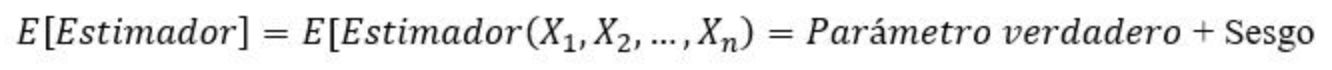

DEFINICIONES:

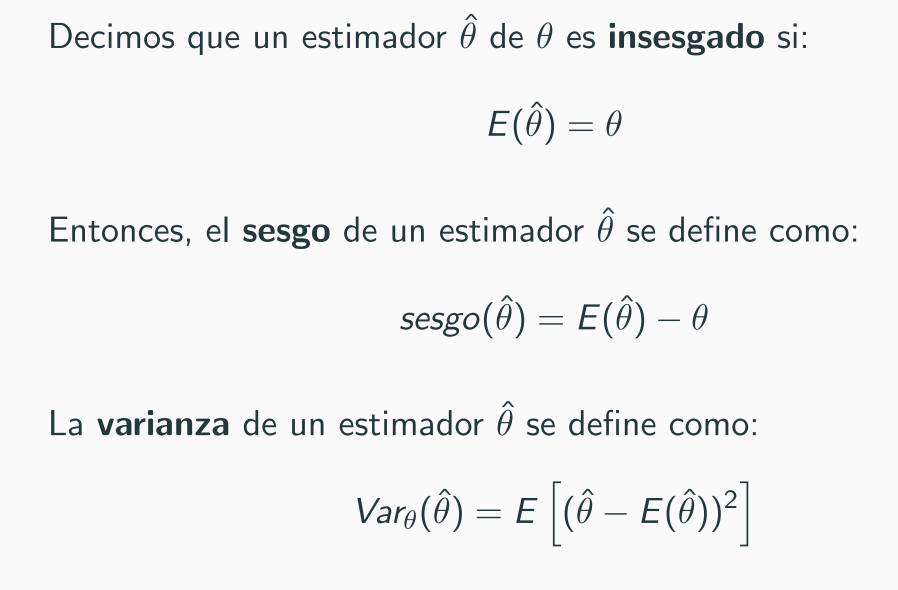

PROPIEDADES DE LOS ESTIMADORES:


1.   Insesgadez: cuando la esperanza de un estimador coincide
con el valor real del parámetro a estimar,
2.   Consistencia: cuando n → ∞ (número de experimentos tiende a infinito), entonces el estimador θb tiende, en probabilidad, al parámetro θ . Es decir, se
hace muy probable que el estimador se “acerque” al
parámetro.



MEDIA POBLACIONAL

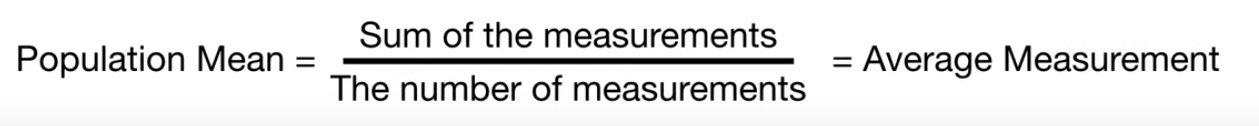

VARIANZA POBLACIONAL

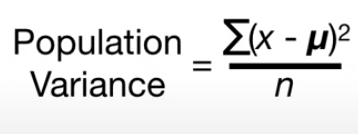

DESVIACIÓN ESTANDAR POBLACIONAL:

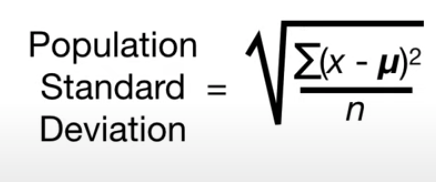


MEDIA MUESTRAL

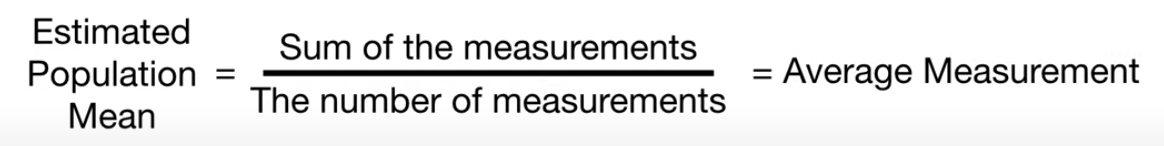

VARIANZA MUESTRAL

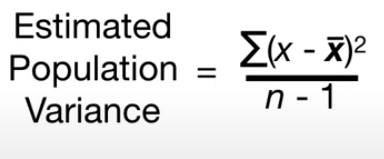

POR QUE DIVIDIMOS POR N-1 EN EL CASO DE LA DESVIACIÓN STANDAR MUESTRAL?

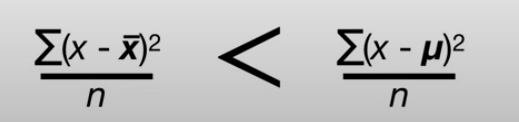




DEMOSTRACIÓN DE INSESGADEZ DE LA MEDIA MUESTRAL COMO ESTIMADOR PUNTUAL DE LA MEDIA POBLACIONAL
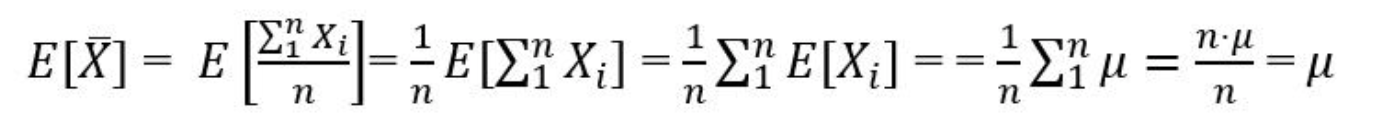

DEMOSTRACIÓN DE SESGADEZ DE LA VARIANZA MUESTRAL COMO ESTIMADOR PUNTUAL DE LA VARIANZA POBLACIONAL

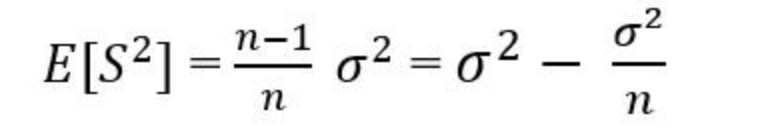



SE DAN CUENTA CUÁL ES EL SESGO DE LA VARIANZA MUESTRAL? HAY ALGUNA FORMA DE ELIMINAR ESTE SESGO? Entonces, esta es la forma matemática de la consistencia

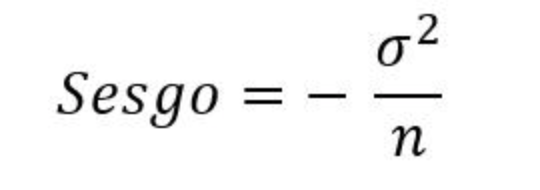

# LEY DE LOS GRANDES NUMEROS

Esta ley afirma que el promedio de variables aleatorias
independientes con una distribución común va a converger a la
media de la distribución a medida que el tamaño crece. Es decir,
de acuerdo a esta ley, el promedio de los resultados obtenidos de
una larga serie de repeticiones se acerca al valor esperado. (media)

El fundameno matemático detrás de esta se soporta en la Desigualdad de Hoeffding. Esta desigualdad  proporciona una cota superior a la probabilidad de que la suma de las variables aleatorias independientes limitadas se desvíe de su valor esperado en más de una cierta cantidad

 \begin{aligned}\operatorname {P} \left({\overline {X}}-\mathrm {E} \left[{\overline {X}}\right]\geq t\right)\leq e^{-2nt^{2}}\end{aligned}

Observen que si aumentamos N (exponente de la cota superior) entonces dicho límite se hace más pequeño. Luego la probabilidad que exista diferencia entre la suma de variables aleatorias y su valor esperado mayor o igual a t tiende a cero.
 

Vamos a simular un experimento de lanzar una moneda. Sabemos que lanzar una moneda es un Bernoulli trial por lo que únicamente puede tener dos posibles resultados y puede ser representado por esta distribución.

Los pasos que realizaremos son:

1.   Generar 500 numeros binarios 1=cara y 0=cruz
2.   Sabemos que la probabilidad que salga cara es 0.5

1.   A medida que vamos aumentando la cantidad de lanzamientos iremos calculando la proporción de caras
2.   Graficaremos los resultados en función de la cantidad de lanzamientos





In [ ]:
def lanzamientos(n): #Defino mi función que toma como parámetro la cantidad de experimentos
  res_lanzamiento=[]
  for i in range(n):
    res_lanzamiento.append(random.randint(0,1)) #Genero n numeros pseudo-aleatorios entre 0 y 1 y los almaceno 
  return res_lanzamiento #Devuelvo una lista con los numeros pseudo-aleatorios 

def res_experimento(size): #Defino mi función que toma como parámetro la cantidad de muestras 
  res=[]
  for i in size: 
    res.append(np.mean(lanzamientos(i))) #Calculo la media de cada una de las muestras (hago size muestras)
  return res #Devuelvo una lista con las medias muestrales

In [ ]:
n_exp=range(1,500) #Genero la cantidad de experimentos que voy a hacer
resultados=res_experimento(n_exp)

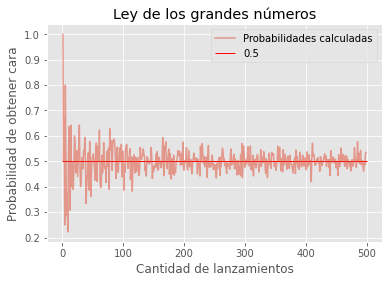

In [ ]:
plt.plot(n_exp,resultados,alpha=0.5,label='Probabilidades calculadas')
plt.hlines(0.5,0,500,linestyles='-',color='r',linewidth=1,label='0.5')
plt.xlabel('Cantidad de lanzamientos')
plt.ylabel('Probabilidad de obtener cara')
plt.title('Ley de los grandes números')
plt.legend()
plt.show()

Podemos observar como a medida que aumenta la cantidad de experimentos la media muestral tiende a la media poblacional disminuyendo la varianza de la muestra! Esta disminución en la varianza es debido a la disminuciónd el sesgo y prueba su propiedad de consistencia como estimador de la varianza poblacional

# TEORMEA DEL LÍMITE CENTRAL

Este teormea muestra que si el tamaño de la muestra es considerablemente
grande, entonces la distribución de la media muestral (de n
variables aleatorias IID- Independientes e Identicamente Distribuidas) se aproxima a una distribución normal,aunque la población no fuera normal.

A medida que n se incrementa, la distribución muestral de la
media muestral estandarizada se aproxima a una distribución normal con media 0 y varianza 1.

Para ver como funciona este teorema vamos a hacer un experimento (tarda en cargar los resultados) : 

1.   Generamos 1000 muestras de cierto n que provengan de una distribución U(0,1) [Uniforme].
2.   Calculamos el promedio (media muestral) para las 10000 muestras.

1.   Vamos aumentando n (arrancando con n = 2) hasta 100 y replicando el experimento.
2.   Graficamos el histograma para ver qué sucede con la distribución de la media muestral.





In [ ]:
def generar_observaciones(n_exp): #Defino mi función que crea las observaciones y toma como parámetro cuantas
  obs=[np.random.uniform(0,1) for i in range(n_exp)] #Genero n_exp observaciones de una distribución uniforme
  return obs #Devuelvo una lista con todas las observaciones

def generar_muestras(l_obs,size=10000):
  res={}
  for n in l_obs: #Creo un bucle para probar todos mis valores de observaciones que quiero probar
    muestras=[]
    for i in range(size): #Hago size muestras 
      muestras.append(np.mean(generar_observaciones(n))) #guardo la media de esa muestra (de n observaciones) en la lista muestras 
    res[n]=muestras #Creo un diccionario donde la key es la cant de observaciones y el value las observaciones
  return res #Devuelvo el diccionario

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

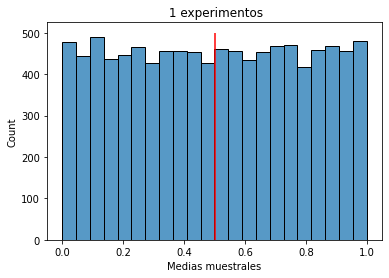

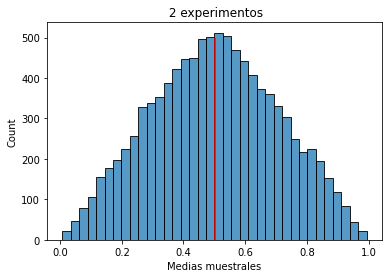

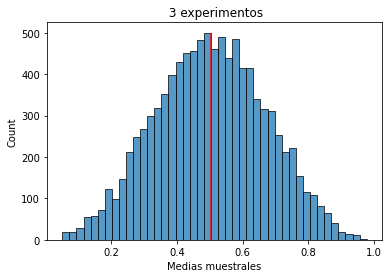

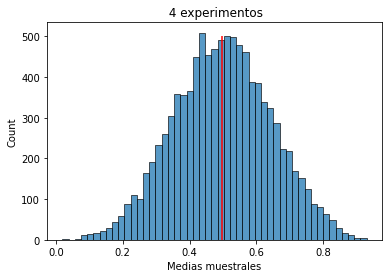

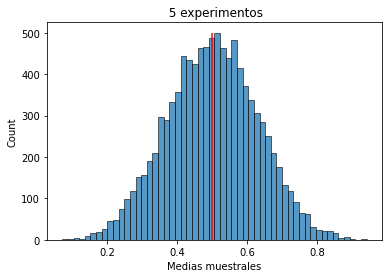

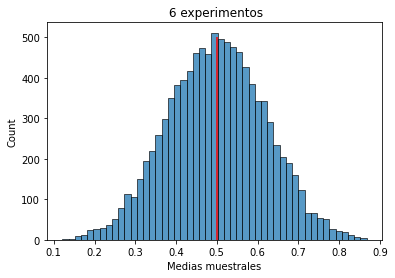

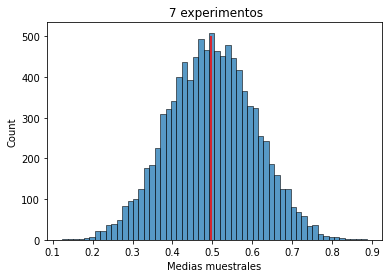

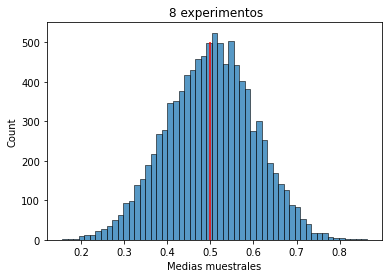

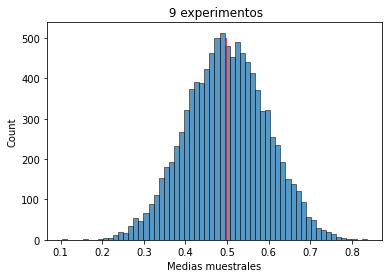

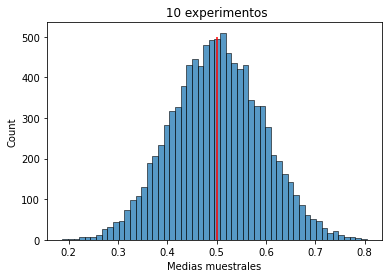

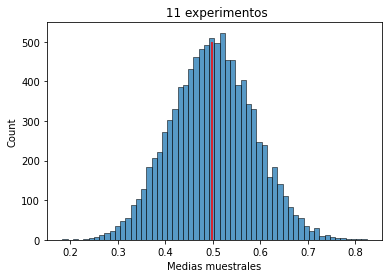

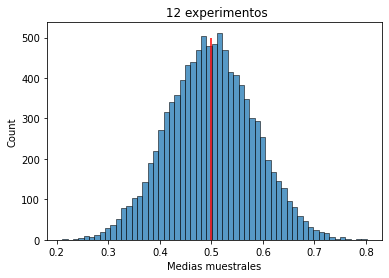

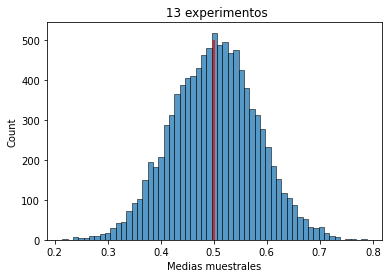

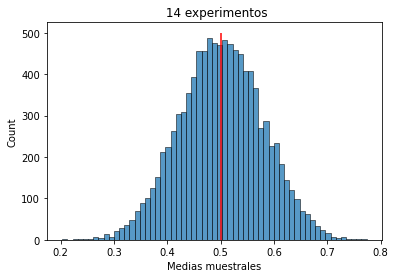

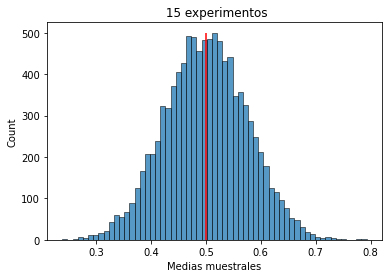

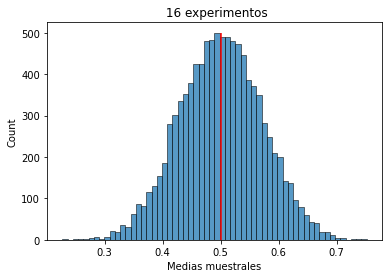

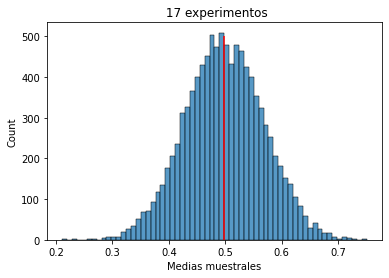

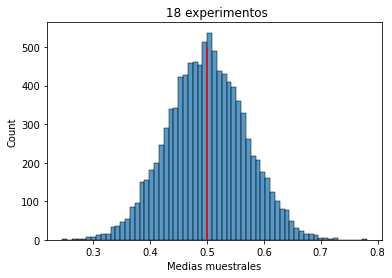

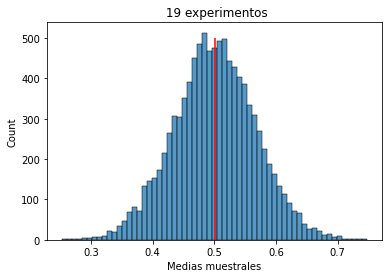

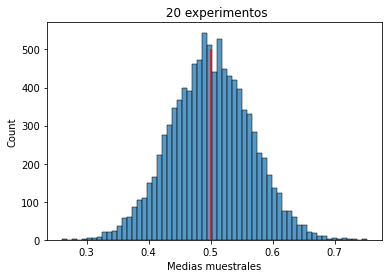

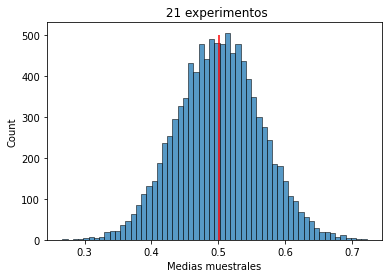

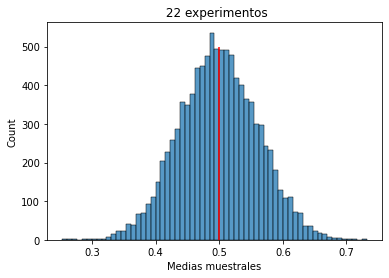

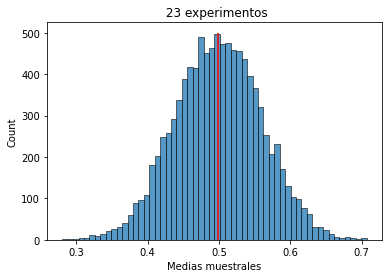

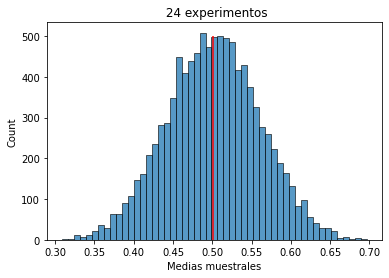

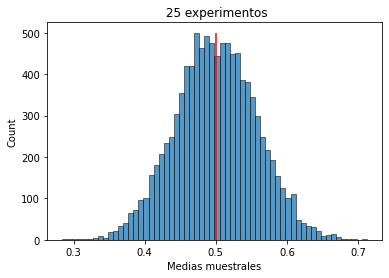

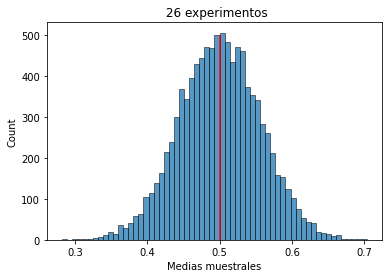

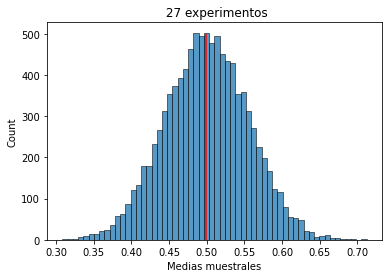

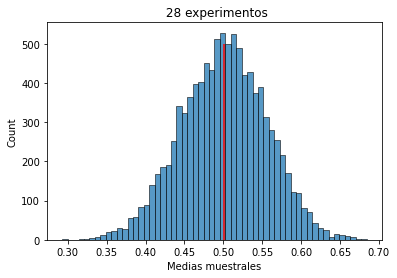

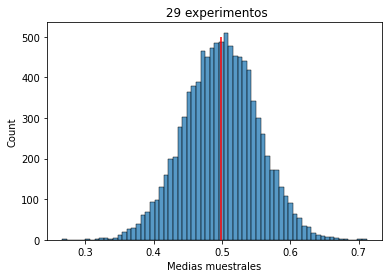

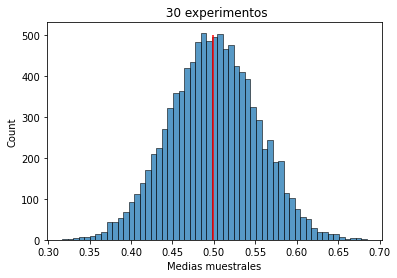

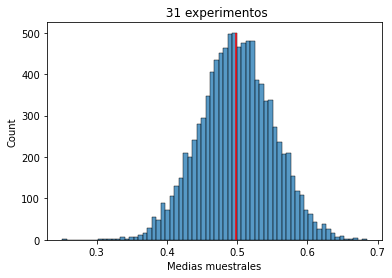

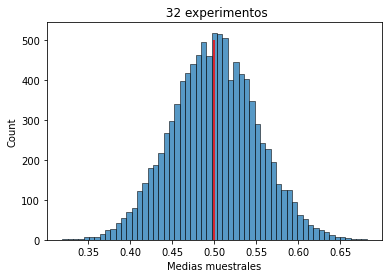

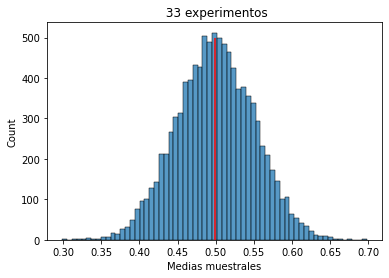

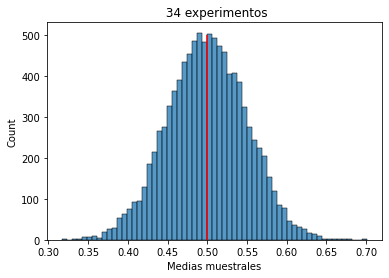

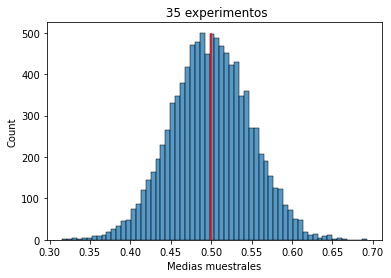

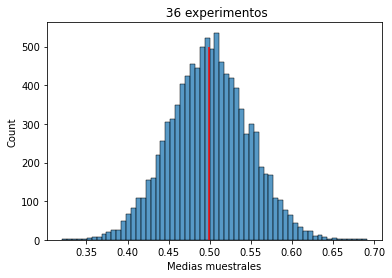

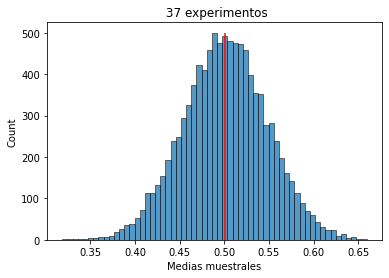

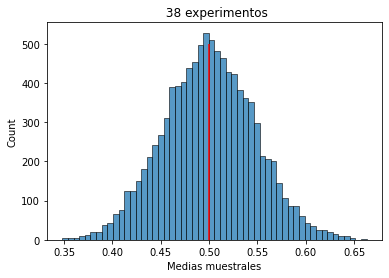

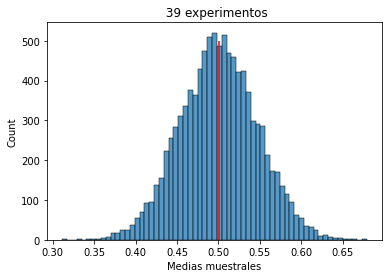

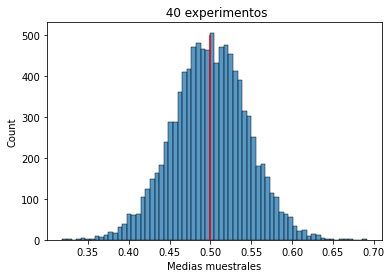

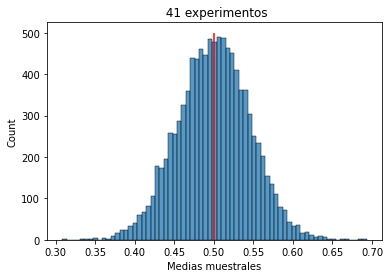

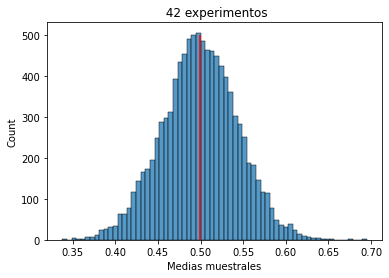

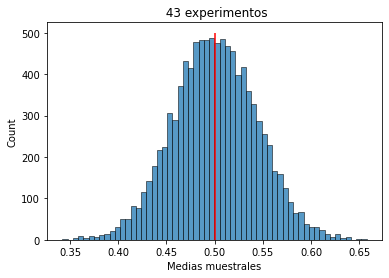

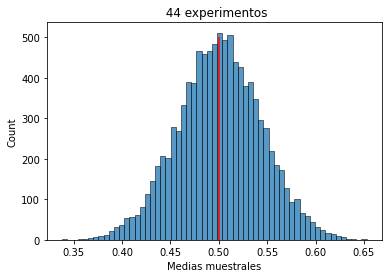

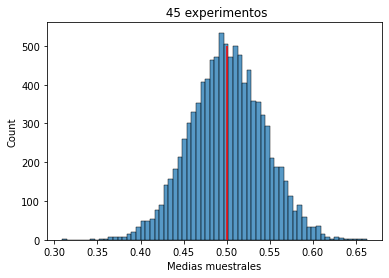

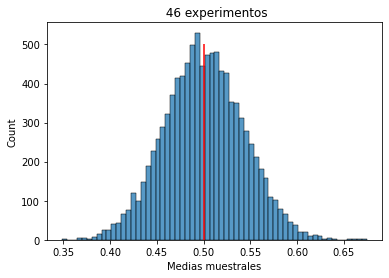

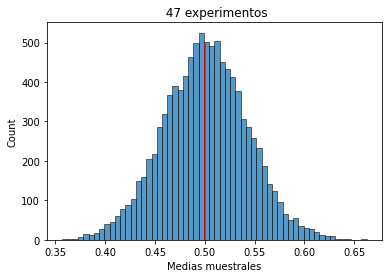

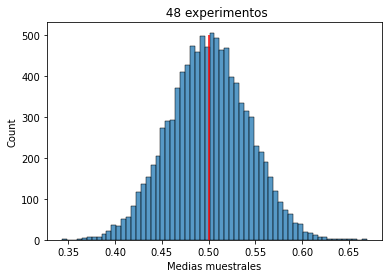

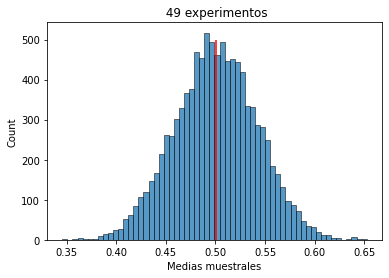

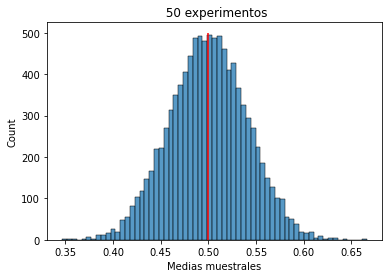

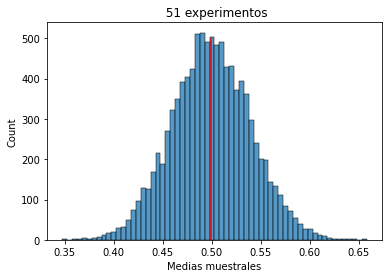

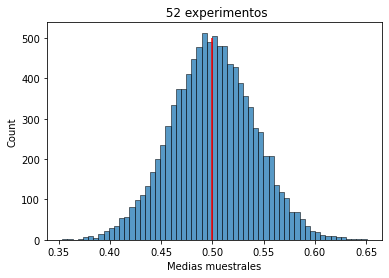

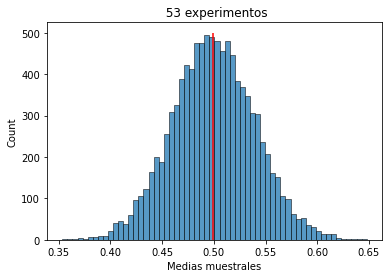

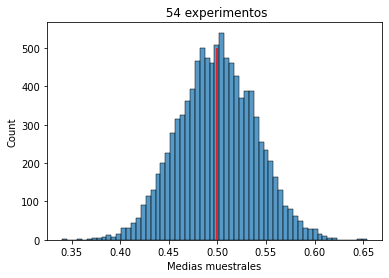

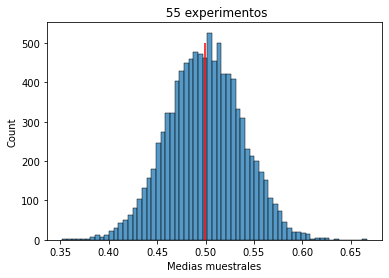

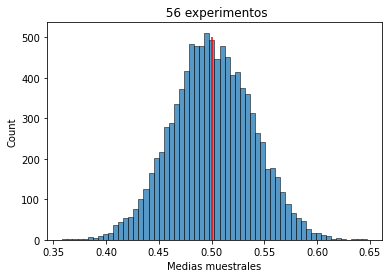

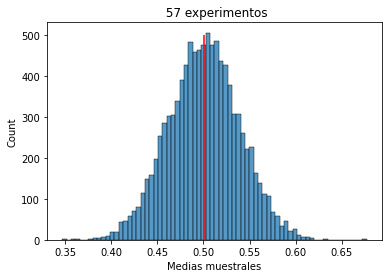

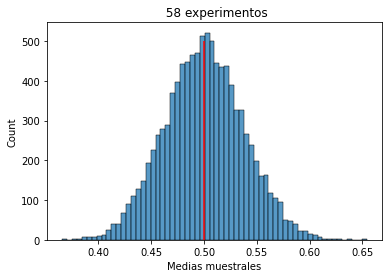

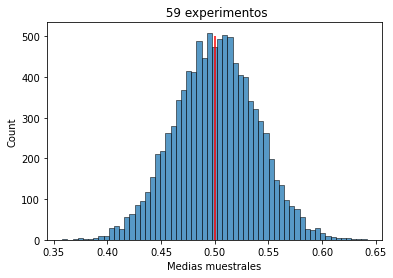

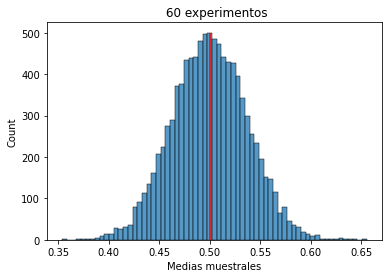

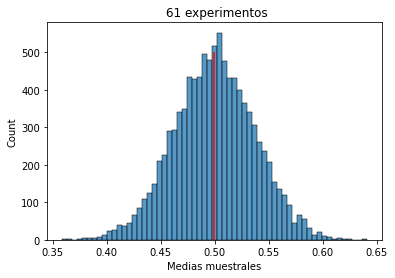

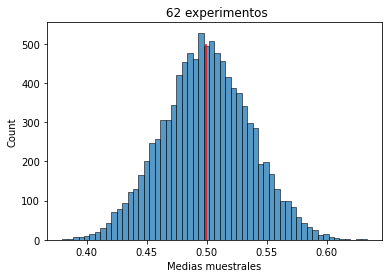

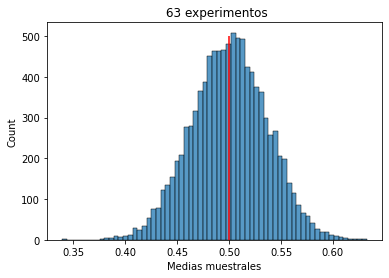

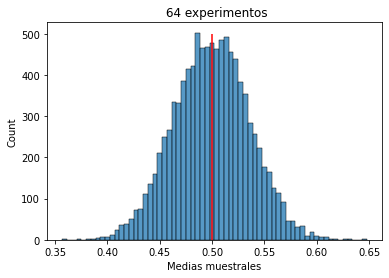

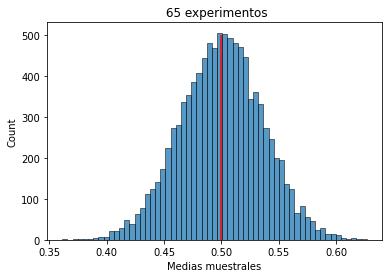

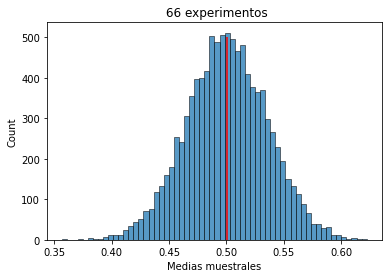

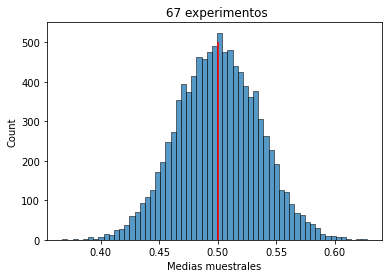

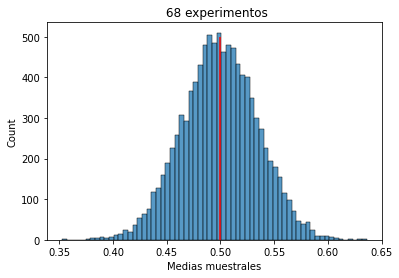

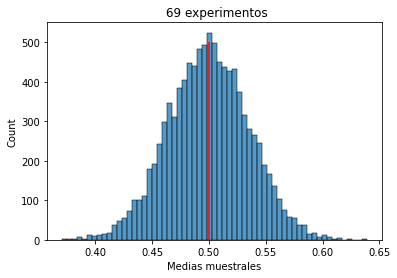

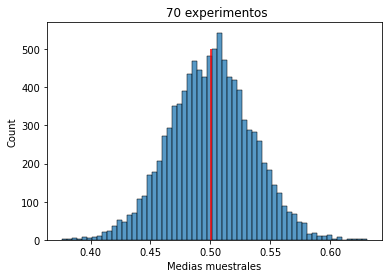

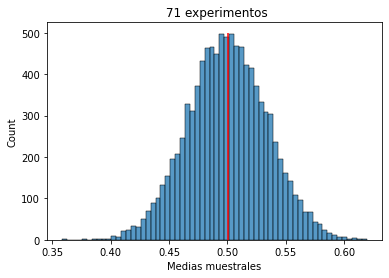

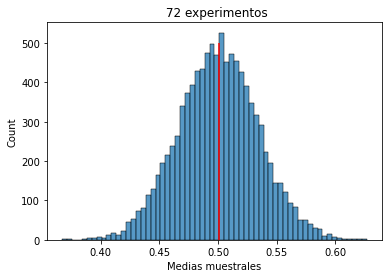

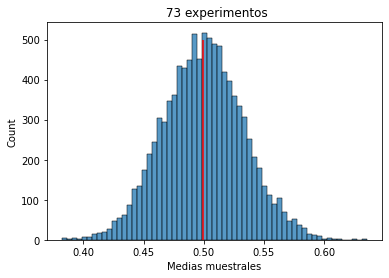

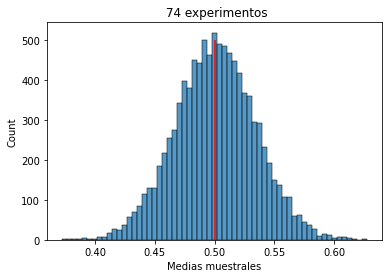

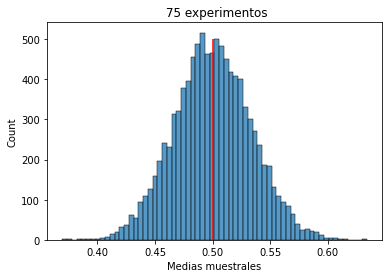

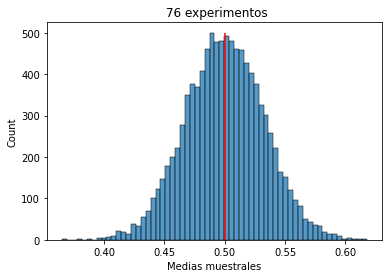

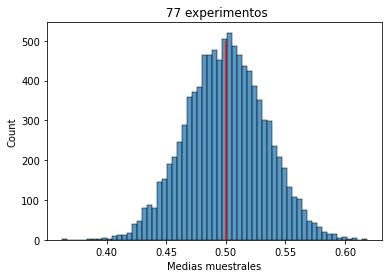

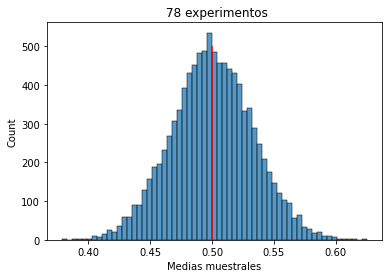

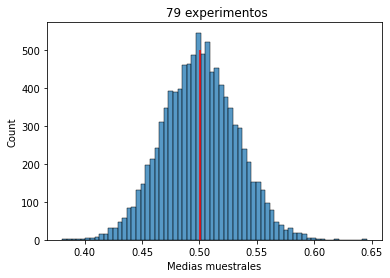

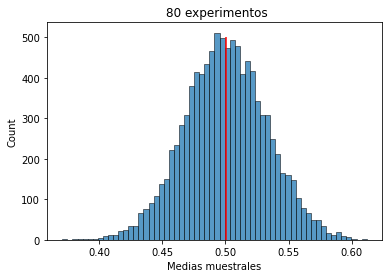

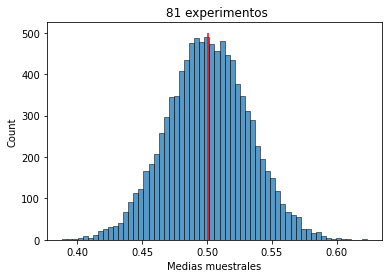

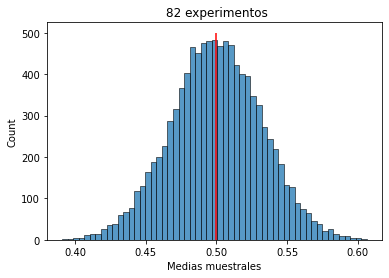

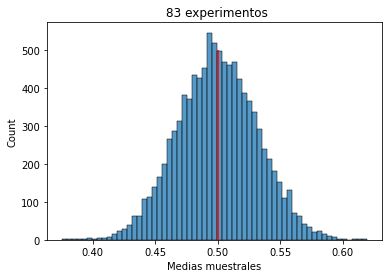

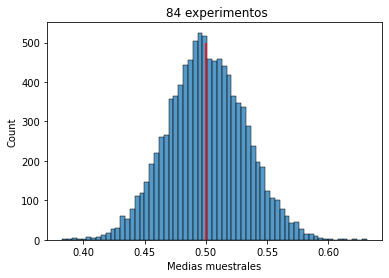

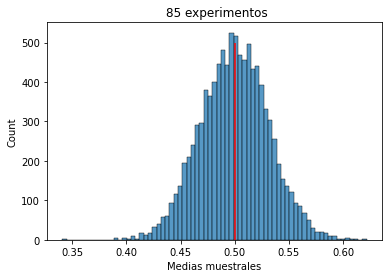

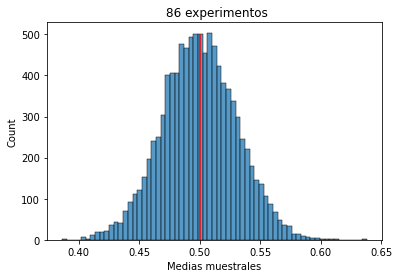

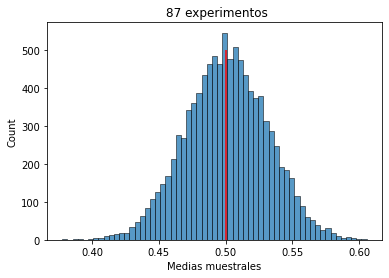

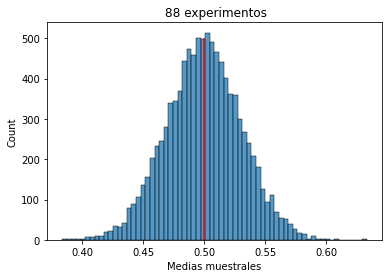

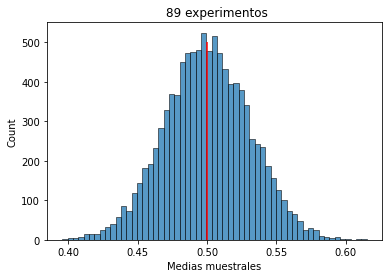

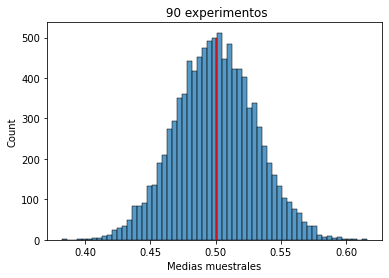

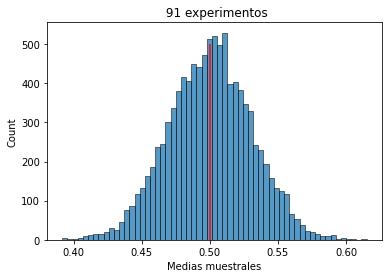

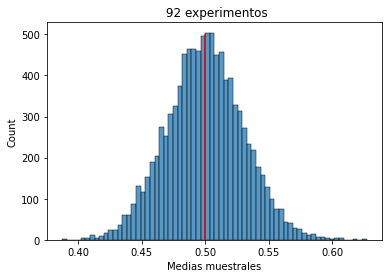

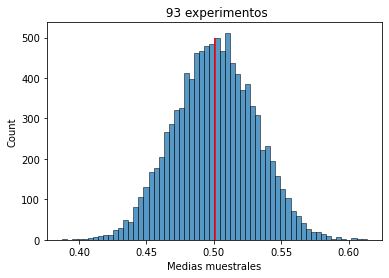

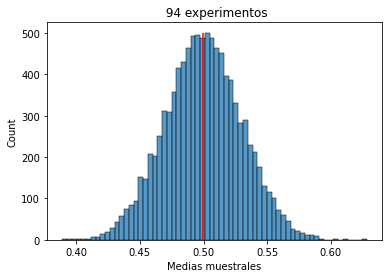

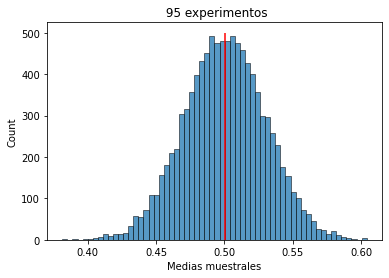

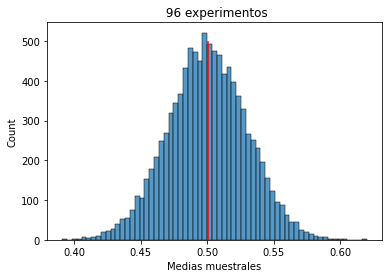

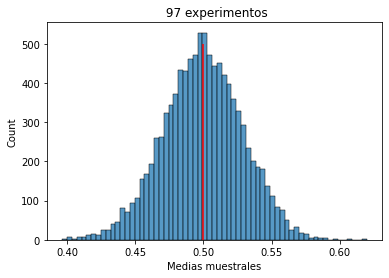

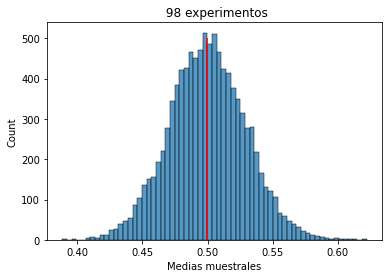

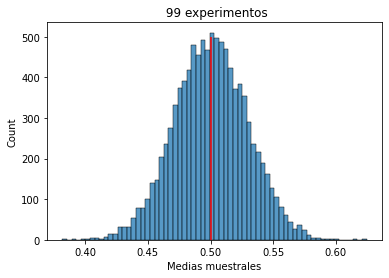

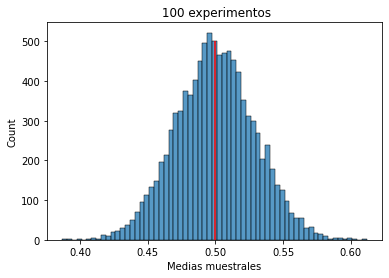

In [ ]:
lista_obs=[*range(1,101)] #Creo el tamaño de cada muestra a probar (cuantas observaciones en cada muestra) 
for k,v in generar_muestras(lista_obs).items(): #"Desempaco" mi diccionaro asignando a la variable k la clave y v los valores 
  fig=plt.figure()                              #Con el bucle hago un gráfico por valor de clave
  sns.histplot(v)
  plt.vlines(np.mean(v),ymin=0,ymax=500,color='r')
  plt.xlabel('Medias muestrales')
  plt.title(f' {k} experimentos')
plt.show()

Comparemos el primer plot con el último, claramente podemos ver la diferencia!. A medida que fuimos agregando observaciones a nuestro experimento vemos como la distribución empieza  tomar una forma de campana.

Lo extremadamente fuerte de este teorema es que no importa de que distribución venga la media muestral ,para muestras suficientemente grande, tiende a la distribución normal por lo que contamos con un estimador de la media poblacional insesgado y de la varianza poblacional consistente!


# INTERVALOS DE CONFIANZA PARA ESTIMADORES PUNTUALES

¿Qué valor esperaríamos del ancho de pétalos si tomaramos la misma muestra muchas veces?

Vamos a verlo simulando hacer 30 muestreos de tamaño 50 (n)

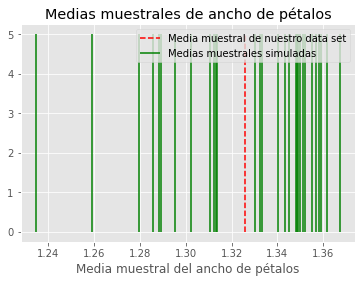

In [ ]:
medias_muestrales=[np.mean(np.random.normal(mu,sigma,50)) for i in range(30)] #Creo una lista con 30 medias muestrales de 50 observaciones a partir de los parámetros calculos al principio
plt.vlines(mu,ymin=0,ymax=5,linestyle='--',color='r',label='Media muestral de nuestro data set')
plt.vlines(medias_muestrales,ymin=0,ymax=5,color='g',label='Medias muestrales simuladas')
plt.title('Medias muestrales de ancho de pétalos')
plt.xlabel('Media muestral del ancho de pétalos')
plt.legend()
plt.show()


Podemos ver que la media calculada varía inclusive en muestras suficientemente grandes debido a la aleatoriedad!. Entonces,tiene sentido, calcular entre que valores se esperaría que el estimador estuviera. Esto se llama INTERVALO DE CONFIANZA

¿Cómo podemos calcular este intervalo de confianza? Se hace con remuestreos y para esto aplicaremos el método bootstrap. Lo poderoso del remuestreo (y gracias a la posibilidad de simular de la computación) es que podemos aplicarlo, y sacar conclusiones, sin conocer la distribución que siguen nuestros datos.

En este sentido nos desligamos de conocer los parámetros y la matemática para inferir estos intervalos. (es más complejo)

Los pasos son:

1.  Calcular las Bootstap Samples (muestras Bootstrap)
2.  Calcular las Boostrap Replicates (estimadores calculados en las muestras Bootstrap)

1.   Calcular el intervalo de confianza deseado a partir de los Bootstrap Replicates


Las muestras Bootstrap son muestreos con reemplazdo de nuestra data original. Con reemplazo quiere decir que si un valor salio elegido una vez puede volver sido a elegir en la próxima elección.






In [ ]:
def bootstrap_samples(data): #Defino mi función que toma una lista/array/serie como parametro
  return np.random.choice(data,len(data)) #Selecciono len(data) cantidad de observaciones de data

def bootstrap_repicate(data,func): #Defino mi función que toma como parámetro una lista/array/serie y una función 
  bs_sample=bootstrap_samples(data)
  return func(bs_sample) #Devuelvo mi muesta bootstrap con una función aplicada

def draw_bootstrap_replicates(data,func,cant): #Defino mi función que toma como parámetro una lista/array/serie, una función y una cantidad de mustras a realizar 
  rep=np.empty(cant)
  for i in range(cant): #Genero cant de muestras
    rep[i]=bootstrap_repicate(data,func) #Guardo cada una de las replicas en una lista
  return rep #Devuelvo mi lista

In [ ]:
bs_replicates = draw_bootstrap_replicates(data, np.mean, cant=10000)

#EL 95% DE CONFIANZA SE CORRESPONDE CON AQUELLOS VALORES NO INCLUIDOS POR DEBAJO EL 2.5% DE LOS VALORES Y MÁS DEL 97.5%
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# IMPRIMIMOS EL INTERVALO DE CONFIANZA DEL 95%
print('El intervalo del 95% de confianza es=', conf_int, 'cm')

El intervalo del 95% de confianza es= [1.27395 1.382  ] cm


El intervalo de confianza calculado quiere decir que si tomaramos 10.000 muestras de la poblacion de especie 1 el 95% de las veces esperamos obtener una media muestral entre 1.272 y 1.38 cm

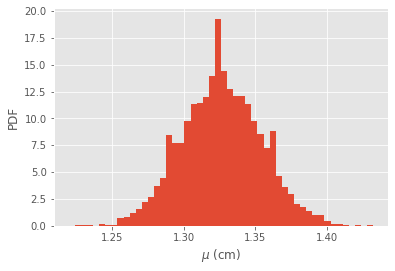

In [ ]:
# PLOTEAMOS LAS REPLICAS
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\mu$ (cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# PAIR BOOTSTRAP



Usaremos el método de Pair Bootstrap cuando el estimador puntual depende de dos variables por ejemplo veremos el caso de fitear una regresión lineal entre el largo y ancho de los pétalos de la especie 1 para obtener su pendiente y ordenada.

In [ ]:
data_2=df_iris.loc[df_iris.target==1,['petal width (cm)','petal length (cm)']].reset_index() # Armamos el set de datos

In [ ]:
indices=np.arange(len(data_2)) #Generamos índices para poder usar la correspondencia entre variables
bs_indices=np.random.choice(indices,len(indices)) #Seleccionamos aleatoriamente los indices
bs_w=data_2.loc[bs_indices,'petal width (cm)'] # Creamos nuestras muestras bootstrap
bs_l=data_2.loc[bs_indices,'petal length (cm)'] # Creamos nuestras muestras bootstrap

0.3111617157229285 -0.005720209367140134


<function matplotlib.pyplot.show>

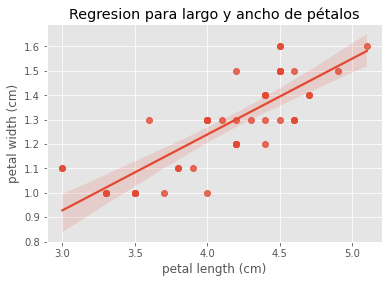

In [ ]:
bs_pendiente, bs_ordenada = np.polyfit(bs_l,bs_w,1) #Regresión lineal
print(bs_pendiente, bs_ordenada)

sns.regplot(bs_l,bs_w) #Graficamos la RL
plt.title('Regresion para largo y ancho de pétalos')
plt.show

¿Qué pasaría si cambia la muestra? Simularemos 20 muestras distintas de la misma población y fitearemos una regresión lineal

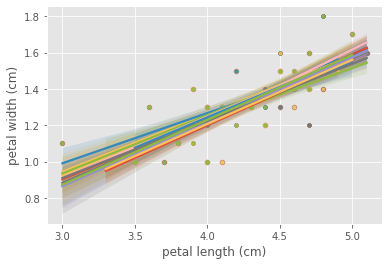

In [ ]:
sns.scatterplot(bs_l,bs_w)
for i in range(20):
  bs_indices=np.random.choice(indices,len(indices))
  bs_w=data_2.loc[bs_indices,'petal width (cm)']
  bs_l=data_2.loc[bs_indices,'petal length (cm)']
  sns.regplot(bs_l,bs_w,marker='.')
plt.show()

In [ ]:
def bs_pairs_lr(x, y, size=1): #Definimos los parámetros que toma la función
    inds = np.arange(len(x))

    #Inicializamos los arreglos como vacíos
    bs_pendiente_reps = np.empty(size)
    bs_ordenada_reps = np.empty(size)

    # Generamos las replicas
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_pendiente_reps[i], bs_ordenada_reps[i] = np.polyfit(bs_x,bs_y,1)
    return bs_pendiente_reps, bs_ordenada_reps

[0.26144302 0.42035465]


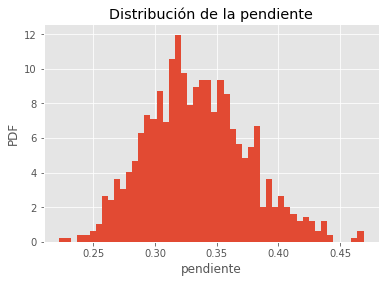

In [ ]:
bs_pendiente_reps, bs_ordenada_reps = bs_pairs_lr(data_2['petal length (cm)'],data_2['petal width (cm)'],1000)  #Generamos una muestra de size 1000 de pendiente y ordenada
print(np.percentile(bs_pendiente_reps, [2.5,97.5]))

plt.hist(bs_pendiente_reps, bins=50, density=True)
plt.xlabel('pendiente')
plt.ylabel('PDF')
plt.title('Distribución de la pendiente')
plt.show()

[-0.46698467  0.21473239]


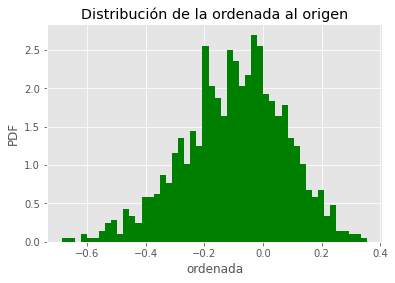

In [ ]:
print(np.percentile(bs_ordenada_reps,[2.5,97.5]))


plt.hist(bs_ordenada_reps, bins=50, density=True,color='g')
plt.xlabel('ordenada')
plt.ylabel('PDF')
plt.title('Distribución de la ordenada al origen')
plt.show()

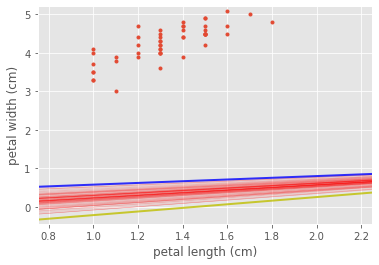

In [ ]:
# Generamos un arreglo de valores de X que serán los que tomará el modelo lineal.
x = np.linspace(0.75,2.25,100)

# Plot las rectas de bootstrap
for i in range(0,100):
    plt.plot(x, 
                 bs_pendiente_reps[i]*x +bs_ordenada_reps[i] ,
                 linewidth=0.5, alpha=0.2, color='red')

# Ploteamos los puntos
plt.plot(data_2['petal width (cm)'],data_2['petal length (cm)'],linestyle='none',marker='.')

# Label axes, set the margins, and show the plot
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.xlim(min(x),max(x))
plt.plot(x, max(bs_pendiente_reps)*x+min(bs_ordenada_reps),
        linewidth=2, alpha=0.8,color='y')
plt.plot(x,min(bs_pendiente_reps)*x+max(bs_ordenada_reps),
         linewidth=2, alpha= 0.8,color='b')
plt.margins(0.02)
plt.show()

# DIFERENCIA ESTADISTICAMENTE SIGNIFICATIVA

In [ ]:
dist1=[ np.random.normal(10,5,100) ] 
dist2=[ np.random.normal(25,8,100) ]

In [ ]:
p1=np.percentile(dist1,[2.5,97.5])
p2=np.percentile(dist2,[2.5,97.5])
print(' Los intervalos de confianza para la distribución 1 y 2 son {} y {} respectivamente'.format(p1,p2))

 Los intervalos de confianza para la distribución 1 y 2 son [-1.09446407 19.63901948] y [11.44692592 34.93656557] respectivamente


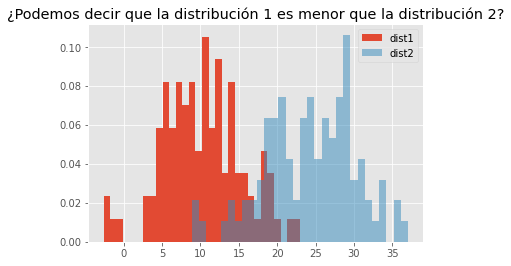

In [ ]:
plt.hist(dist1,bins=30,density=True,label='dist1')
plt.hist(dist2,bins=30,density=True,alpha=0.5,label='dist2')
plt.title('¿Podemos decir que la distribución 1 es menor que la distribución 2?')
plt.legend()
plt.show()

Estos son los casos dónde hablamos de que la diferencia entre ambas distribuciones no son estadísticamente significativas. Imaginene si estas distribuciones correspondieran a la media muestral de votantes que se espera obtener para el partido A (rojo) y el partido B (celeste). 

Podríamos ir a decirle al candidado de B que esperaríamos que ganara, o que lo hiciera con mucha diferencia? En realidad no, debido a que esta diferencia que vemos entre las medias no es estadísticamente significativa y podría darse el caso que A>B o A=B.

Dos formas de saber si la diferencia no es estadísticamente significativa:


1.   Intervalos de confianza que se solapan
2.  Distribuciones que se solapan



# TEST DE HIPÓTESIS

Asumimos que la hipotesis nula (H0) es cierta y testeamos una hipótesis alternativa (H1). La idea es encontrar evidencia suficiente para rechazar la hipótesis nula, o aceptarla, pero NUNCA podemos decir que la hipótesis alternativa es cierta.

Queremos saber si la distribucion del ancho de pétalos de la especie 1 y 2 son iguales (H0).

In [ ]:
data1=df_iris.loc[df_iris.target==1,'petal width (cm)'].reset_index()
data2=df_iris.loc[df_iris.target==2,'petal width (cm)'].reset_index()

In [ ]:
mean1,mean2=np.mean(data1.iloc[2]),np.mean(data2.iloc[2])
median1,median2=np.median(data2.iloc[2]),np.median(data2.iloc[2])
des1,des2=np.std(data1.iloc[2]),np.std(data2.iloc[2])

print(mean1,mean2)
print(median1,median2)
print(des1,des2)


26.75 52.05
52.05 52.05
25.25 49.95


# TEST DE PERMUTACIÓN

En este caso es un poco evidente que las distribuciones son distintas pero que pasaría si no fuera tan evidente? Entonces podemos simular cómo sería si las distribuciones fueran iguales y testearlo. Para esto usaremos un test de permutación. 

Los pasos son:


1.   Stackear verticalmente ambas series para ignorar de que especie vienen
2.   Permutamos las posiciones

1.   Asignamos la cantidad que había de la especie 1 como especie 1 y el resto a la especie 2
2.   Graficamos la CDF permutadas y observadas





In [ ]:
def muestras_permutadas(data1, data2):

    # Concatenamos los arreglos
    data = np.concatenate((data1, data2))

    # Hacemos la permutación
    data_permutada = np.random.permutation(data)

    # Speramos en dos nuevos arreglos permutados
    ps_1 = data_permutada[:len(data1)]
    ps_2= data_permutada[len(data1):]

    return ps_1, ps_2



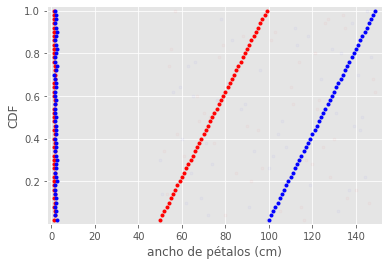

In [ ]:
perm_sample_1, perm_sample_2 = muestras_permutadas(data1,data2)
    # Creamos los ECDF
x_1, y_1 = cdf(perm_sample_1)
x_2, y_2 = cdf(perm_sample_2)

    # Ploteamos la ECDF de la muestras permutadas
_ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
_ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
  # Creamos la ECDF de la muestra observada
x_1, y_1 = cdf(data1)
x_2, y_2 = cdf(data2)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('ancho de pétalos (cm)')
_ = plt.ylabel('CDF')

plt.show()

Cómo se puede observar las muestras permutadas se solapan, lo que indica que la permutación está bien hecha PERO no se solapan con las distribuciones originales por lo que indica que rechazaríamos la H0 que decía: los anchos de los pétalos de la especie 1 y 2 están identicamente distribuidas.